In [ ]:
# @title Project
import pandas as pd
df=pd.read_csv("IMDBMovie.csv")
df

,ID,Title,Genre,Director,Year,Runtime_minutes,Rating,Votes,Revenue_millions
0,1,Guardians of the Galaxy,Action,James Gunn,2014,121,8.1,757074,333.13
1,2,Prometheus,Adventure,Ridley Scott,2012,124,7.0,485820,126.46
2,3,Split,Horror,M. Night Shyamalan,2016,117,7.3,157606,138.12
3,4,Sing,Animation,Christophe Lourdelet,2016,108,7.2,60545,270.32
4,5,Suicide Squad,Action,David Ayer,2016,123,6.2,393727,325.02
...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,Crime,Billy Ray,2015,111,6.2,27585,NaN
996,997,Hostel: Part II,Horror,Eli Roth,2007,94,5.5,73152,17.54
997,998,Step Up 2: The Streets,Drama,Jon M. Chu,2008,98,6.2,70699,58.01
998,999,Search Party,Adventure,Scot Armstrong,2014,93,5.6,4881,NaN


In [ ]:
# @title Task 1
# How many rows are in the IMDB Dataset?
df.shape[0]

1000

In [ ]:
# @title Task 2
# What is the 75th Percentile of rating in the IMDB dataset?
df.describe()

,ID,Year,Runtime_minutes,Rating,Votes,Revenue_millions
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000


In [ ]:
# @title Task 3
# How many NA values are there in the field "Revenue"?
df['Revenue_millions'].isnull().sum()

128

In [ ]:
# @title Task 4
# How many movies have revenue higher than 75 Million?
df[df['Revenue_millions']>75]['ID'].count()

318

In [ ]:
# @title Task 5
# How many movies have revenue greater than 50 million but rating less than 7?
df[(df['Revenue_millions']>50)&(df['Rating']<7)]['ID'].count()

211

In [ ]:
# @title Task 6
# What  is the total revenue generated by movies in the year 2015?
df.groupby(by='Year')['Revenue_millions'].sum()

Year
2006     3624.46
2007     4306.23
2008     5053.22
2009     5292.26
2010     5989.65
2011     5431.96
2012     6910.29
2013     7666.72
2014     7997.40
2015     8854.12
2016    11211.65
Name: Revenue_millions, dtype: float64

In [ ]:
# @title Task 7
# What is the average Rating for the Genre Adventure in the year 2015?
df[(df['Genre']=="Adventure")&(df['Year']==2015)]['Rating'].mean()

6.8

In [ ]:
# @title Task 8
# What is the Average Duration of the movies in rows 75 to 150? please note that the rows in python start from 0
df.loc[75:150,'Runtime_minutes'].mean()

127.47368421052632

In [ ]:
# @title Task 9
# Which year generated the highest revenue?
df.groupby(by='Year')['Revenue_millions'].max().sort_values(ascending=False)

Year
2015    936.63
2009    760.51
2012    623.28
2008    533.32
2016    532.17
2013    424.65
2006    423.03
2010    414.98
2011    380.96
2014    350.12
2007    336.53
Name: Revenue_millions, dtype: float64

In [ ]:
# @title Task 10
# What is the Maximum revenue out of (10,20,30,40,50) rows?
df.loc[10:51:10,'Revenue_millions'].max()

936.63

In [ ]:
# @title Task 11
# How many  movies with the genres 'Adventure', 'Action', 'Horror', and 'Crime' Exist in the IMDB dataset?
df[df['Genre'].isin(['Adventure','Action','Horror','Crime'])]['ID'].count()

485

In [ ]:
# @title Task 12
# Create a genre-level report with matrics average rating, the average number of votes, and the average revenue.
# Find all the matrics for the "Horror" genre?
genre=input("Enter Genre:")
cond = (df['Genre']==genre)
avg_rating=df[cond]['Rating'].mean()
print("Average Rating for",genre," is",avg_rating)
avg_votes=df[cond]['Votes'].mean()
print("Average Votes for",genre," is",avg_votes)
avg_rev=df[cond]['Revenue_millions'].mean()
print("Average Revenue for",genre," is",avg_rev)


Enter Genre:Horror
Average Rating for Horror  is 5.867391304347826
Average Votes for Horror  is 79435.41304347826
Average Revenue for Horror  is 39.94685714285714


In [ ]:
# @title Task 13
# How many movies has Billy Ray directed and find the year of release of those movies
cond=df[df['Director']=="Billy Ray"]
mov_count=cond['Director'].count()
mov_rel=cond['Year']
print("Movies Directed by Billy Ray is",mov_count, "And Year of Release is",mov_rel)

Movies Directed by Billy Ray is 1 And Year of Release is 995    2015
Name: Year, dtype: int64


In [ ]:
# @title Task 14
# How many movies were released in the year 2012 - 14. What type of genre were released the most
cond=df[df['Year'].isin([2012,2013,2014])]['Year'].count()
print("No.of Movies Released from 2012-2014 are",cond)
cond1=df[df['Year'].isin([2012,2013,2014])]
genre_released_the_most=cond1['Genre'].value_counts().max()
print("Types of genre Released the most is",genre_released_the_most)


No.of Movies Released from 2012-2014 are 253
Types of genre Released the most is 84


In [ ]:
# @title Task 15
# Which movie has the Highest vote and what genre it belongs to.
cond=df['Votes'].max()
cond1=df[df['Votes']==cond]
cond2=cond1[['Title','Genre']]
cond2

,Title,Genre
54,The Dark Knight,Action


In [ ]:
# @title Task 16
# Find the director Whose movie grossed the highest. Also find the total revenue generated by that Director.
cond=df['Revenue_millions'].max()
cond1=df[df['Revenue_millions']==cond]
print("Director with highest Grossed movie is", cond1['Director'])
cond2 = df[df['Director']=='J.J. Abrams'].sum()
print("Total Revenue generatedby", cond1['Director'],"is",cond2)

Director with highest Grossed movie is 50    J.J. Abrams
Name: Director, dtype: object
Total Revenue generatedby 50    J.J. Abrams
Name: Director, dtype: object is ID                                                               1923
Title               Star Wars: Episode VII - The Force AwakensStar...
Genre                                 ActionActionActionMysteryAction
Director            J.J. AbramsJ.J. AbramsJ.J. AbramsJ.J. AbramsJ....
Year                                                            10054
Runtime_minutes                                                   633
Rating                                                           37.9
Votes                                                         2174937
Revenue_millions                                              1683.45
dtype: object


In [ ]:
# @title Task 17
# Find the total no.of votes for inputed genre
genre=input("Enter the Genre:")
cond=df[df['Genre']==genre]['Votes'].sum()
print("Total no.of Votes for", genre,"is" ,cond)

Enter the Genre:Action
Total no.of Votes for Action is 69132934


In [ ]:
# @title Task 18
# Order the Directors based on their Revenue in millions in ascending order
df.groupby(by='Director')['Revenue_millions'].sum().sort_values()

Director
Greg Kwedar             0.00
Chris Stokes            0.00
John Butler             0.00
Chris McCoy             0.00
Jim Sheridan            0.00
                      ...   
Francis Lawrence     1299.81
Michael Bay          1421.32
Christopher Nolan    1515.09
David Yates          1630.51
J.J. Abrams          1683.45
Name: Revenue_millions, Length: 644, dtype: float64

In [ ]:
# @title Task 19
# Find the Average Rating for each genre and find the lowest Reting Genre
df.groupby(by='Genre')['Rating'].mean().sort_values()

Genre
Sci-Fi       4.966667
Fantasy      5.850000
Horror       5.867391
Thriller     5.960000
Comedy       6.493143
Action       6.592491
Romance      6.600000
Crime        6.807042
Mystery      6.876923
Adventure    6.908000
Drama        6.954872
Biography    7.318750
Animation    7.324490
Name: Rating, dtype: float64

In [ ]:
# @title DATA VISUALIZATION WITH MATPLOTLIB
'''
Matplotlib is the popular python library for creating static, animated, and interactive visualization in a wide range of formats.
It is created by John D. Hunter in 2003 and has since become a go-to tool for data Scientist, Researches, and engineers for creating high-quality plots and Charts.
Matplotlib provides a flexiable and Comprehension set of functions and Classes for Creating various type of plots, Scatter plots, bar Plots,
pie Charts, and more.
'''

'\nMatplotlib is the popular python library for creating static, animated, and interactive visualization in a wide range of formats.\nIt is created by John D. Hunter in 2003 and has since become a go-to tool for data Scientist, Researches, and engineers for creating high-quality plots and Charts.\nMatplotlib provides a flexiable and Comprehension set of functions and Classes for Creating various type of plots, Scatter plots, bar Plots,\npie Charts, and more.\n'

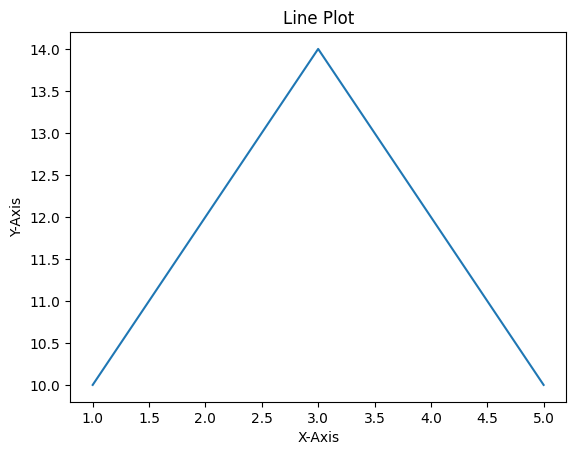

In [ ]:
# @title Line Plot
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=[10,12,14,12,10]
plt.plot(x,y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Line Plot")
plt.show()

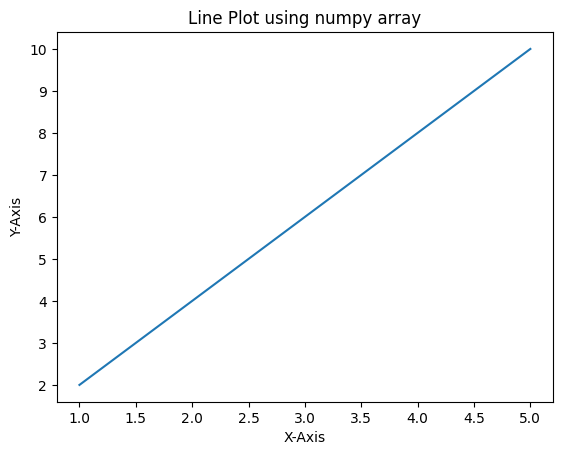

In [ ]:
# @title Line Polt using numpy Array
import numpy as np
x=np.array([1,2,3,4,5])
y=x*2
plt.plot(x,y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Line Plot using numpy array")
plt.show()

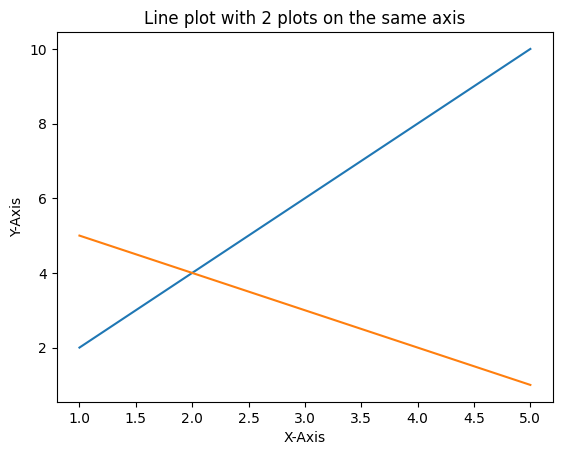

In [ ]:
# @title Two plots on the same axis
# Here we will see how to add 2 plots within the same axis
x=np.array([1,2,3,4,5])
y=x*2
plt.plot(x,y)
x1=[1,2,3,4,5]
y1=[5,4,3,2,1]
plt.plot(x1,y1)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Line plot with 2 plots on the same axis")
plt.show()

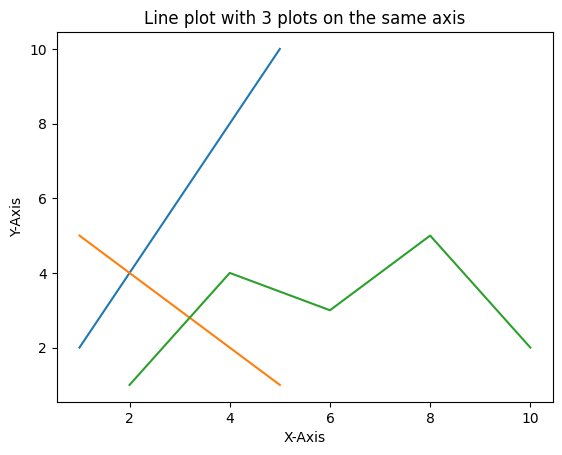

In [ ]:
# @title Three Plots using the same axis
# Here we will see how to add 3 plots within the same axis
x=np.array([1,2,3,4,5])
y=x*2
plt.plot(x,y)
x1=[1,2,3,4,5]
y1=[5,4,3,2,1]
plt.plot(x1,y1)
x2=[2,4,6,8,10]
y2=[1,4,3,5,2]
plt.plot(x2,y2)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Line plot with 3 plots on the same axis")
plt.show()

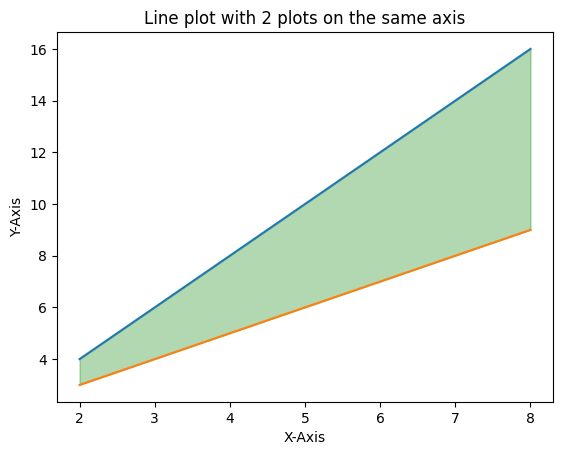

In [ ]:
# @title Fill the area between two plots
# Here we will see how to add 2 plots within the same axis
x=np.array([2,4,6,8])
y=x*2
plt.plot(x,y)
x1=[2,4,6,8]
y1=[3,5,7,9]
plt.plot(x1,y1)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Line plot with 2 plots on the same axis")
plt.fill_between(x,y,y1,color='Green',alpha=0.3)
plt.show()

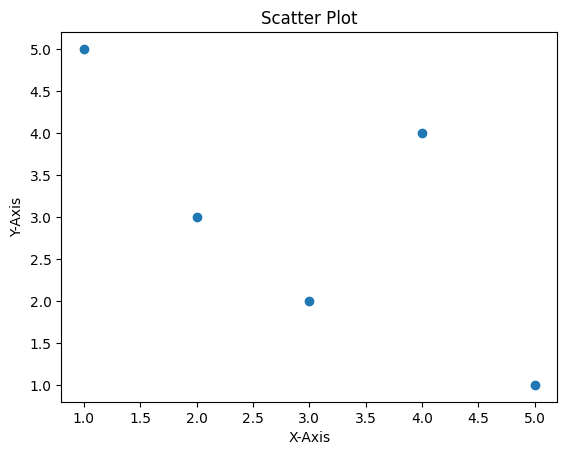

In [ ]:
# @title Scatter plot
x=[1,2,3,4,5]
y=[5,3,2,4,1]
plt.scatter(x,y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Scatter Plot")
plt.show()

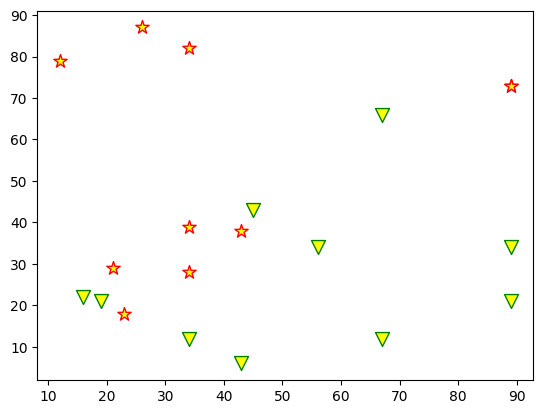

In [ ]:
# @title Scatter plot with different shape and colour for two datasets
#Dataset 1
x1=[89,43,45,67,56,34,89,67,16,19]
y1=[21,6,43,12,34,12,34,66,22,21]
#Dataset 2
x2=[26,89,21,43,12,89,34,34,23,34]
y2=[87,73,29,38,79,73,82,28,18,39]
plt.scatter(x1,y1,
            c="Yellow",
            linewidths=1,
            marker="v",
            edgecolors="Green",
            s=100)
plt.scatter(x2,y2,
            c="Yellow",
            linewidths=1,
            marker="*",
            edgecolors="Red",
            s=100)

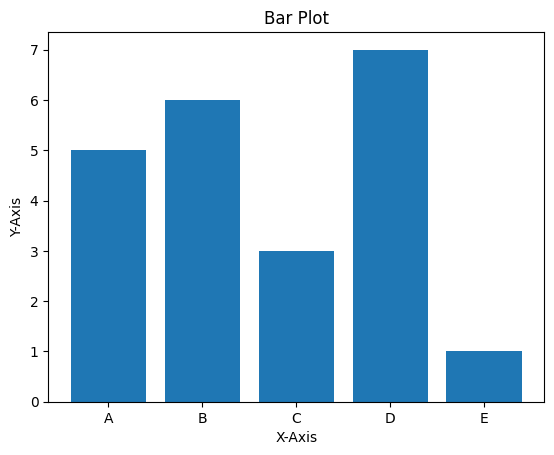

In [ ]:
# @title Bar Chart
x=['A','B','C','D','E']
y=[5,6,3,7,1]
plt.bar(x,y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Bar Plot")
plt.show()

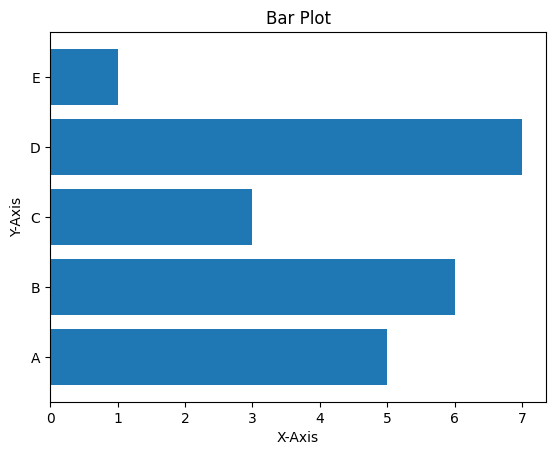

In [ ]:
# @title Horizontal Bars
x=['A','B','C','D','E']
y=[5,6,3,7,1]
plt.barh(x,y)
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Bar Plot")
plt.show()

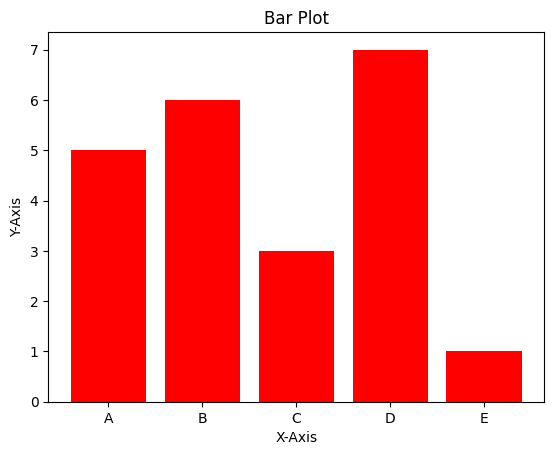

In [ ]:
# @title Bar Color
x=['A','B','C','D','E']
y=[5,6,3,7,1]
plt.bar(x,y,color='red')
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Bar Plot")
plt.show()

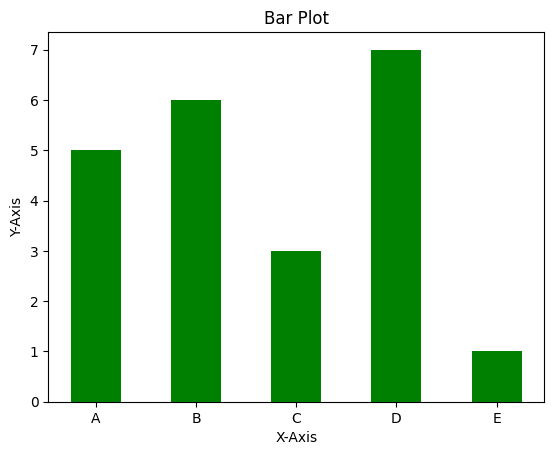

In [ ]:
# @title Bar Width
x=['A','B','C','D','E']
y=[5,6,3,7,1]
plt.bar(x,y,width=0.5,color='green')
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Bar Plot")
plt.show()

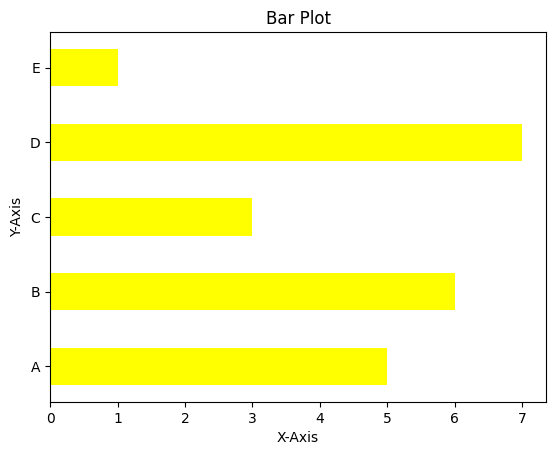

In [ ]:
# @title Bar Height
x=['A','B','C','D','E']
y=[5,6,3,7,1]
plt.barh(x,y,height=0.5,color='yellow')
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.title("Bar Plot")
plt.show()

In [ ]:
# @title Pie Chart


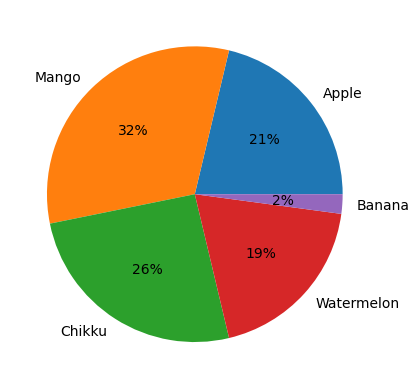

In [ ]:
# @title Abbreviation
categories=['Apple','Mango','Chikku','Watermelon','Banana']
data=[10,15,12,9,1]
plt.pie(data,labels=categories, autopct = "%1.f%%")
plt.show()

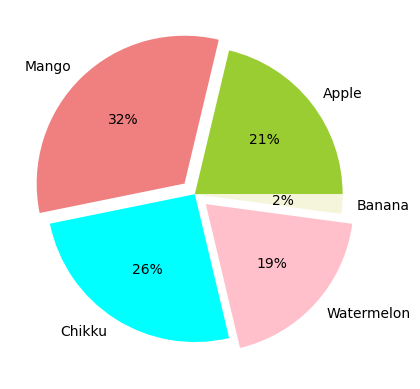

In [ ]:
categories=['Apple','Mango','Chikku','Watermelon','Banana']
data=[10,15,12,9,1]
explode=[0,0.1,0,0.1,0]
plt.pie(data,labels=categories, autopct = "%1.f%%",explode=explode,colors=['yellowgreen','lightcoral','cyan','pink','beige'])
plt.show()

In [ ]:
# @title Abbreviation
'''
In the string '%1.1f%%', the format elements have the following meanings:
'%': This is a literal '%' Character that will be displayed after the numeric value.
It indicates that you want to display the percentage symbol.
'.1f': This is a format specification for a floating_point number.
Here, it means that you want to display the percentage value with one decimal place.
so, when you use autoptc='%1.1f%%', it tells Matplotlib to format the percentage values with one
decimmal place follwed by the '%' symbol. For example, if a wedge of the pie chart represents 25.5% of the total,
It will be displayed as "25.5%" on the chart.
'''

'\nIn the string \'%1.1f%%\', the format elements have the following meanings:\n\'%\': This is a literal \'%\' Character that will be displayed after the numeric value.\nIt indicates that you want to display the percentage symbol.\n\'.1f\': This is a format specification for a floating_point number.\nHere, it means that you want to display the percentage value with one decimal place.\nso, when you use autoptc=\'%1.1f%%\', it tells Matplotlib to format the percentage values with one\ndecimmal place follwed by the \'%\' symbol. For example, if a wedge of the pie chart represents 25.5% of the total,\nIt will be displayed as "25.5%" on the chart.\n'

In [ ]:
# @title Visualization With Seaborn
import pandas as pd
df=pd.read_csv('nba.csv')
df

,Name,Team,Number,Position,Age,Height(Inch),Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,6.2,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,6.6,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,6.5,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,6.5,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,6.1,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41,PF,20,6.1,234,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8,PG,26,6.3,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,6.1,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,7.3,256,NaN,2900000.0


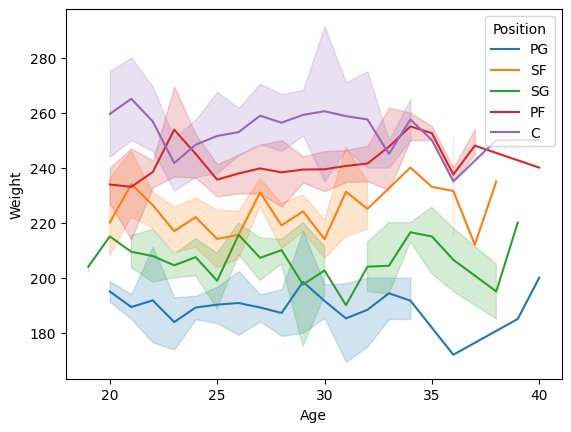

In [ ]:
# importing Seaborn library
import matplotlib.pyplot as plt
import seaborn as sns
# Line Plot
sns.lineplot(x=df['Age'],y=df['Weight'],hue=df['Position'])
plt.show()

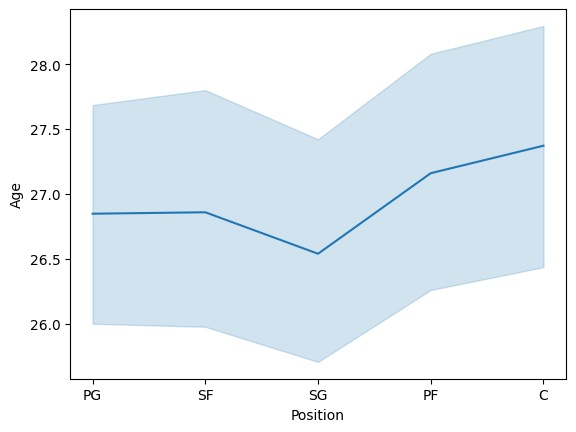

In [ ]:
# Find which position has the  highest average age in the nba dataset using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x=df['Position'],y=df['Age'])
plt.show()

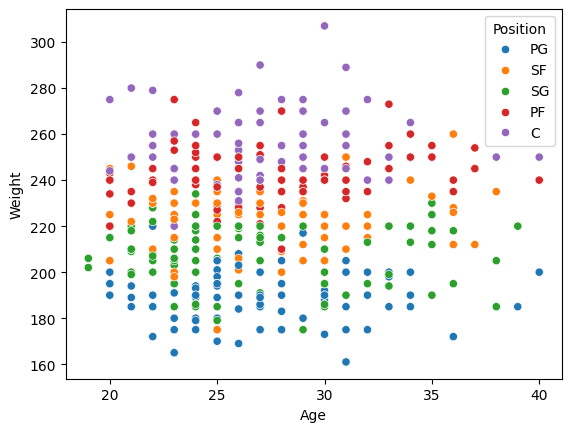

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Weight'],hue=df['Position'])
plt.show()

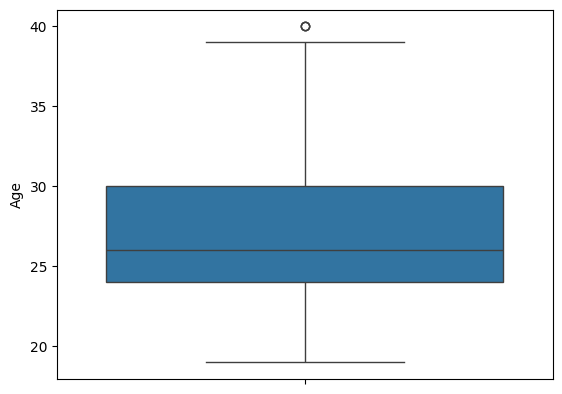

In [ ]:
#Boxplot
sns.boxplot(df['Age'])
plt.show()

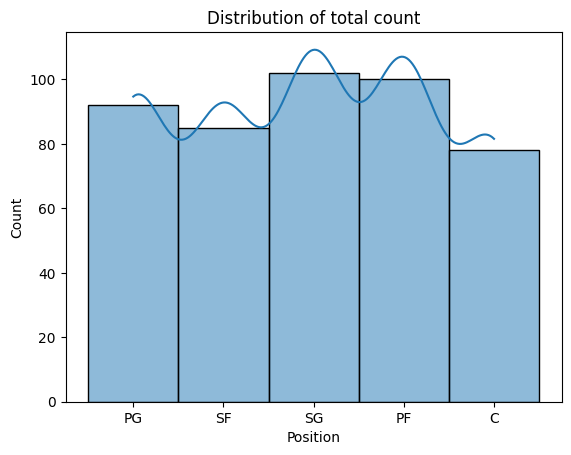

In [ ]:
# Histogram
sns.histplot(df['Position'],kde=True)
plt.title("Distribution of total count")
plt.show()

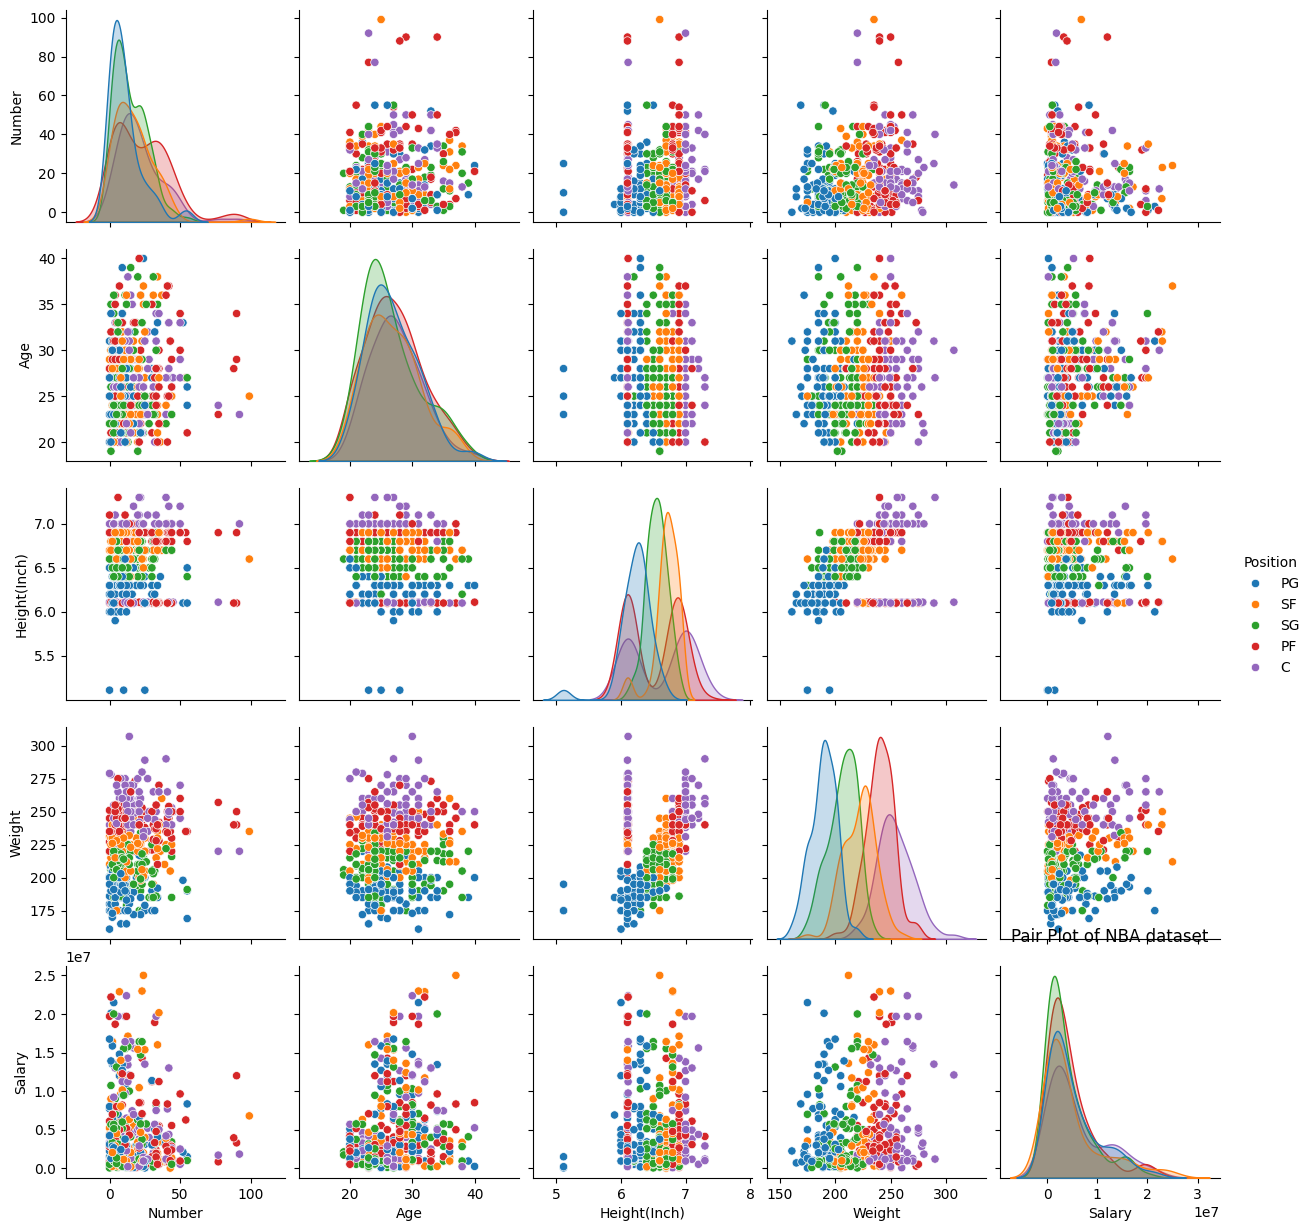

In [ ]:
#Cresting a Pair plot
sns.pairplot(df,hue='Position')
plt.title("Pair Plot of NBA dataset")
plt.show()

In [ ]:
# @title Project 3
# Analysis for the Marvel Dataset
import pandas as pd
df=pd.read_csv('marvel_box_office.csv')
df.columns

Index(['Movie', 'Release Date', 'Release Month', 'Release Day', 'Release Year',
       'Ownership', 'Domestic Box Office', 'Inflation Adjusted Domestic',
       'International Box Office', 'Inflation Adjusted International',
       'Worldwide Box Office', 'Inflation Adjusted Worldwide',
       'Opening Weekend', 'Budget', 'IMDb Score', 'Meta Score', 'Tomatometer',
       'Rotten Tomato Audience Score', 'Run Time In Minutes', 'Phase',
       'Director'],
      dtype='object')

In [ ]:
# No.of Rows
df.shape[0]

66

In [ ]:
#No.of Columns
df.shape[1]

21

In [ ]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Movie                             66 non-null     object 
 1   Release Date                      66 non-null     object 
 2   Release Month                     66 non-null     object 
 3   Release Day                       66 non-null     int64  
 4   Release Year                      66 non-null     int64  
 5   Ownership                         66 non-null     object 
 6   Domestic Box Office               66 non-null     int64  
 7   Inflation Adjusted Domestic       66 non-null     int64  
 8   International Box Office          66 non-null     int64  
 9   Inflation Adjusted International  66 non-null     float64
 10  Worldwide Box Office              66 non-null     int64  
 11  Inflation Adjusted Worldwide      66 non-null     float64
 12  Opening We

In [ ]:
# description of the dataset
df.describe()

,Release Day,Release Year,Domestic Box Office,Inflation Adjusted Domestic,International Box Office,Inflation Adjusted International,Worldwide Box Office,Inflation Adjusted Worldwide,Opening Weekend,Budget,IMDb Score,Meta Score,Tomatometer,Rotten Tomato Audience Score,Run Time In Minutes
count,66.000000,66.000000,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,6.600000e+01,66.000000,66.000000,66.000000,66.000000,66.000000
mean,10.469697,2013.469697,2.609213e+08,3.274682e+08,3.937843e+08,4.873712e+08,6.547056e+08,8.148394e+08,9.729623e+07,1.617848e+08,9.783333,57.796970,66.803030,73.696970,124.712121
std,8.304252,6.612854,1.835237e+08,2.149869e+08,3.322940e+08,3.853466e+08,5.028107e+08,5.826769e+08,6.674879e+07,7.395979e+07,16.592487,16.871122,25.080314,19.472244,17.440682
min,1.000000,1998.000000,8.050977e+06,1.180735e+07,2.106557e+06,3.089421e+06,1.015753e+07,1.489677e+07,4.271451e+06,3.300000e+07,4.300000,4.300000,9.000000,18.000000,92.000000
25%,4.000000,2008.000000,1.377073e+08,1.867671e+08,1.789552e+08,2.176628e+08,3.059375e+08,4.144679e+08,5.517972e+07,1.170000e+08,6.425000,48.250000,47.000000,64.250000,112.250000
50%,7.500000,2014.500000,2.157992e+08,2.664460e+08,3.628757e+08,4.148466e+08,5.996869e+08,7.296717e+08,8.564829e+07,1.625000e+08,6.950000,63.000000,76.500000,79.500000,124.000000
75%,16.000000,2018.750000,3.550611e+08,4.389893e+08,5.035717e+08,6.489334e+08,8.492293e+08,9.969889e+08,1.248166e+08,2.000000e+08,7.600000,69.000000,88.500000,87.000000,134.000000
max,30.000000,2023.000000,8.583730e+08,9.867541e+08,1.930539e+09,2.219277e+09,2.788912e+09,3.206031e+09,3.571150e+08,4.000000e+08,110.000000,88.000000,96.000000,98.000000,181.000000


In [ ]:
# Checking the null Values
df.isnull().sum()

Movie                                0
Release Date                         0
Release Month                        0
Release Day                          0
Release Year                         0
Ownership                            0
Domestic Box Office                  0
Inflation Adjusted Domestic          0
International Box Office             0
Inflation Adjusted International     0
Worldwide Box Office                 0
Inflation Adjusted Worldwide         0
Opening Weekend                      0
Budget                               0
IMDb Score                           0
Meta Score                           0
Tomatometer                          0
Rotten Tomato Audience Score         0
Run Time In Minutes                  0
Phase                               33
Director                             0
dtype: int64

In [ ]:
# @title Task 1
# what is the average IMDb score of the movies in the dataset?
df['IMDb Score'].mean()

9.783333333333331

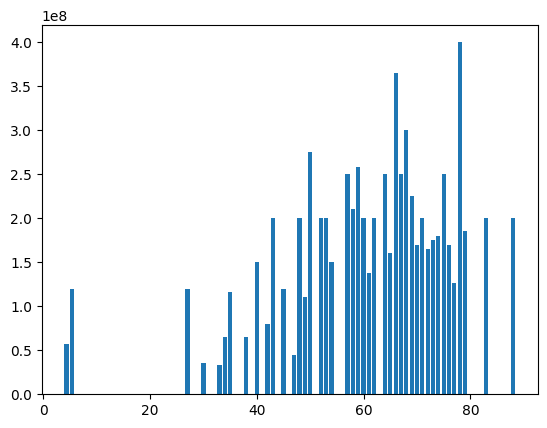

In [ ]:
# @title Task 2
# How does the distribution of Meta score look in the dataset?
import matplotlib.pyplot as plt
plt.bar(df['Meta Score'],df['Budget'])
plt.show()

In [ ]:
# @title Task 3
# Which movie had the highest opening weekend box office Revenue?
high_open_weekend=df['Opening Weekend'].max()
df[df['Opening Weekend']==high_open_weekend]['Movie']

21    Avengers: Endgame
Name: Movie, dtype: object

In [ ]:
# @title Task 4
# Is there a correlation between Budget and the Box Office revenue?
df['Budget'].corr(df['Domestic Box Office'])

0.6847608698595791

In [ ]:
# @title Task 5
# What is the most common release month for movies in the dataset?
df['Release Month'].value_counts().index[0]

'May'

In [ ]:
# @title Task 6
# How many movies were released in each Phase?
df['Phase'].value_counts()

Phase
Three    11
Four      7
One       6
Two       6
Five      3
Name: count, dtype: int64

In [ ]:
# @title Task 7
# What is the average run time of the movies in the dataset?
df['Run Time In Minutes'].mean()

124.71212121212122

In [ ]:
# @title Task 8
# which Director had the highest average IMDb score for their movies?
df.groupby(by=['Director'])['IMDb Score'].mean().sort_values(ascending=False).index[0]

'Mark Neveldine, Brian Taylor'

<BarContainer object of 66 artists>

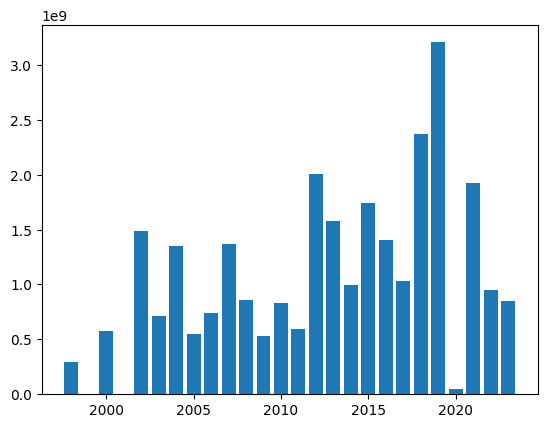

In [ ]:
# @title Task 9
# What is the overall trend in the  inflation-adjusted worldwide box office over the year?
plt.bar(df['Release Year'],df['Inflation Adjusted Worldwide'])

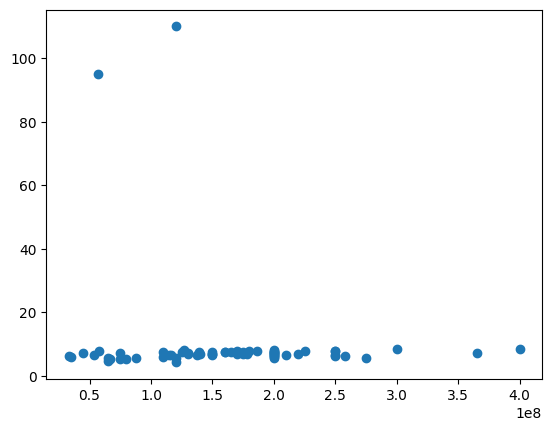

In [ ]:
# @title Task 10
# Do movies with higher budgets tend to have higher IMDb scores?
plt.scatter(df['Budget'],df['IMDb Score'])

In [ ]:
# @title Task 11
#What is the average Rotten Tomatoes Audience Score For movies in each phase?
df.groupby(by=df['Phase'])['Rotten Tomato Audience Score'].mean().sort_values()

Phase
One      78.833333
Three    83.363636
Two      84.000000
Five     86.000000
Four     88.428571
Name: Rotten Tomato Audience Score, dtype: float64

In [ ]:
# @title Task 12
#How many Movies Fall under each ownership category(e.g., Studio, independent)?
df.groupby(by=df['Ownership'])['Movie'].count().sort_values()

Ownership
Lionsgate Films      2
New Line Cinema      3
Sony Pictures       10
20th Century Fox    18
Marvel Studios      33
Name: Movie, dtype: int64

In [ ]:
# @title Task 13
#what is the average budget for movies in each ownership category?
df.groupby(by=df['Ownership'])['Budget'].mean().sort_values()

Ownership
Lionsgate Films     3.400000e+07
New Line Cinema     5.466667e+07
20th Century Fox    1.248611e+08
Sony Pictures       1.495000e+08
Marvel Studios      2.031303e+08
Name: Budget, dtype: float64

In [ ]:
# @title Task 14
# What is the  average inflation_adjusted domestic box office revenue for each director ?
df.groupby(by=df['Director'])['Inflation Adjusted Domestic'].mean().sort_values()

Director
Lexi Alexander                  1.180735e+07
Josh Boone                      2.669491e+07
Rob Bowman                      4.009896e+07
Jonathan Hensleigh              5.708306e+07
Mark Neveldine, Brian Taylor    6.848997e+07
Josh Trank                      7.009701e+07
Daniel Espinosa                 7.386553e+07
Simon Kinberg                   7.569412e+07
Nia DaCosta                     8.450022e+07
David S. Goyer                  8.861932e+07
Guillermo del Toro              1.480306e+08
Stephen Norrington              1.574827e+08
Chloe Zhao                      1.669289e+08
Mark Steven Johnson             1.781535e+08
Cate Shortland                  1.859473e+08
Matthew Vaughn                  1.944110e+08
Louis Leterrier                 1.977043e+08
Andy Serkis                     2.162080e+08
James Mangold                   2.186588e+08
Destin Daniel Cretton           2.273501e+08
Tim Story                       2.280178e+08
Peyton Reed                     2.300059e+08
J

In [ ]:
# @title Task 15
# Correlation between budget and worldwide box office revenue
df['Budget'].corr(df['Worldwide Box Office'])

0.7297106701387257

In [ ]:
# @title Task 16
# Average run time of movies for each director
df.groupby(by=df['Director'])['Run Time In Minutes'].mean().sort_values()

Director
Josh Boone                       94.000000
Andy Serkis                      97.000000
Rob Bowman                       97.000000
Tim Story                        99.000000
Josh Trank                      100.000000
Lexi Alexander                  103.000000
Daniel Espinosa                 104.000000
Brett Ratner                    104.000000
Nia DaCosta                     105.000000
Gavin Hood                      107.000000
Tim Miller                      108.000000
Alan Taylor                     112.000000
Ruben Fleischer                 112.000000
Louis Leterrier                 112.000000
Simon Kinberg                   113.000000
David S. Goyer                  113.000000
Scott Derrickson                115.000000
Kenneth Brangh                  115.000000
Guillermo del Toro              117.000000
David Leitch                    119.000000
Peyton Reed                     119.666667
Stephen Norrington              120.000000
Anna Boden & Ryan Fleck         123.000000
Jo

In [ ]:
# @title Task 17
# Ownership category with the highest average IMDb score
df.groupby(by=df['Ownership'])['IMDb Score'].mean().sort_values(ascending=False).index[0]

'Sony Pictures'

In [ ]:
# Most common release day
df['Release Day'].mode()

0    3
Name: Release Day, dtype: int64

In [ ]:
# Director with the highest cumulative worldwidev box office revenue
df.groupby(by=df['Director'])['Worldwide Box Office'].sum().idxmax()

'Anthony and Joe Russo'

In [ ]:
# Average run time of movies in each ownership category
df.groupby(by=df['Ownership'])['Run Time In Minutes'].mean().sort_values()

Ownership
Lionsgate Films     113.500000
20th Century Fox    113.944444
New Line Cinema     116.666667
Sony Pictures       125.700000
Marvel Studios      131.696970
Name: Run Time In Minutes, dtype: float64

In [ ]:
# Correlation Between Release Day and IMDb SCORE
df['Release Day'].corr(df['IMDb Score'])

0.12827007163489518

In [ ]:
# Correlation between Runtimme and Budget
df['Run Time In Minutes'].corr(df['Budget'])

0.6479515467580399